In [1]:


#Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
adverstising=pd.read_csv('advertising.csv')
adverstising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
adverstising.shape

(200, 4)

In [4]:
adverstising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
adverstising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
adverstising.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

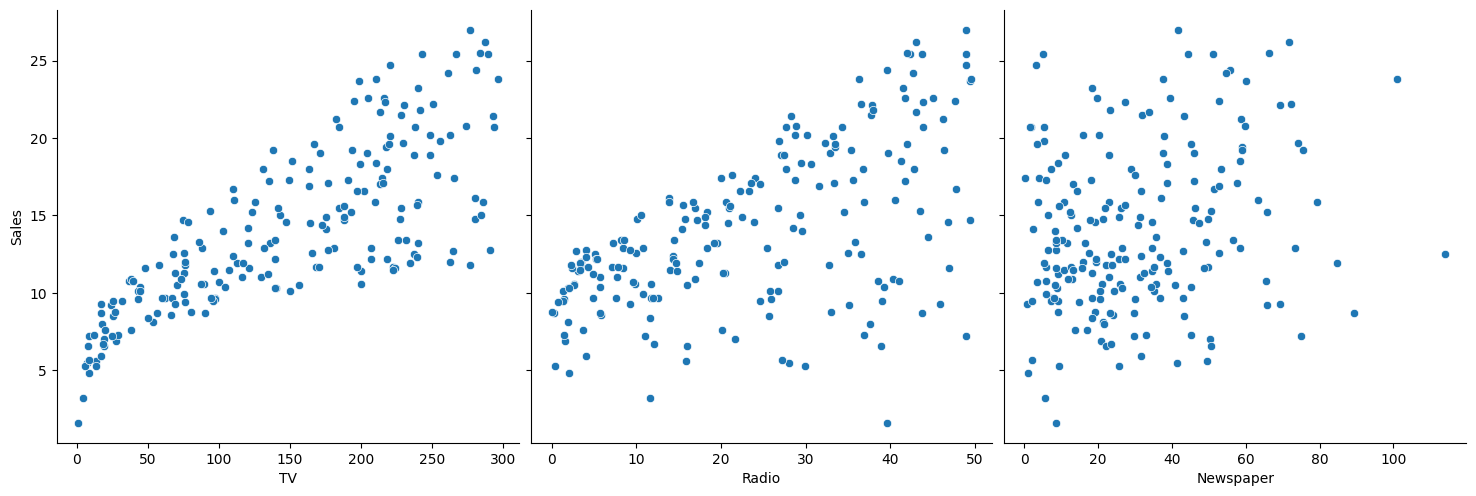

In [7]:
sns.pairplot(adverstising,x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales',height=5,kind='scatter')

[]

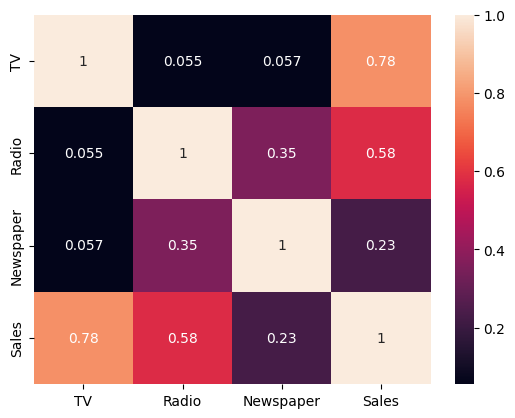

In [8]:
sns.heatmap(adverstising.corr(),annot=True)
plt.plot()

In [9]:
adverstising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
X = adverstising['TV']
y = adverstising['Sales']

In [11]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.3)

In [13]:
print(X_train.shape)

(140,)


In [14]:
print(X_test.shape)

(60,)


In [15]:
lm=LinearRegression()

In [16]:
X_train.ndim

1

In [17]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [18]:
X_train.ndim

2

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lm.intercept_)
print(lm.coef_)

6.745302251222065
[0.05024351]


In [21]:
y_test_pred=lm.predict(X_test)
y_train_pred=lm.predict(X_train)

In [22]:
print(r2_score(y_test,y_test_pred))
print(r2_score(y_train,y_train_pred))

0.5111616978794153
0.6411433688483876


In [23]:
print(mean_squared_error(y_test,y_test_pred))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

10.822786314941839
3.2898003457568423


In [24]:
# adjusted r square

In [25]:
x=r2_score(y_test,y_test_pred)
n=X_test.shape[0]
k=X_test.shape[1]
print(n)
print(k)
adj_r2=1-((1-x)*(n-1)/(n-k-1))
print(adj_r2)

60
1
0.5027334512911295


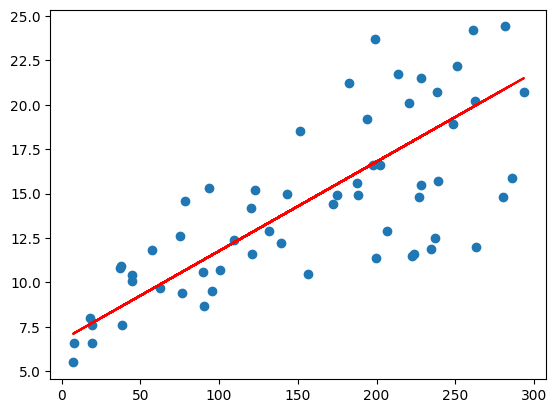

In [26]:
plt.scatter(X_test,y_test)
plt.plot(X_test,0.05024351*X_test+6.745302251222065,'r')
plt.show()

In [27]:
# Multiple linear reg.

# all independent var

In [28]:
X = adverstising[['TV','Radio', 'Newspaper']]
y = adverstising['Sales']

In [29]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [30]:
X_train_all,X_test_all,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.3)

In [31]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
X_train_all=rs.fit_transform(X_train_all)
X_test_all=rs.transform(X_test_all)

In [32]:
#training
lm1=LinearRegression()
lm1.fit(X_train_all,y_train)

# prediction
y_test_pred=lm1.predict(X_test_all)
y_train_pred=lm1.predict(X_train_all)

In [33]:
print(r2_score(y_test,y_test_pred))
print(r2_score(y_train,y_train_pred))

0.8868821951328664
0.8997682984995


In [34]:
mean_squared_error(y_test,y_test_pred)

2.504406518845738

In [35]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

1.582531680202876

In [36]:
print(lm1.intercept_)
print(lm1.coef_)

13.90674294882269
[ 6.87905274  4.96304171 -0.05375624]
